In [1]:
import tensorflow as tf
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [2]:
tf.test.is_built_with_cuda()

True

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import os.path as op
import pickle

In [2]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Model,Sequential,load_model
from keras.layers import Input, Embedding
from keras.layers import Dense, Bidirectional
from keras.layers.recurrent import LSTM
import keras.metrics as metrics
import itertools
from tensorflow.python.keras.utils.data_utils import Sequence
from decimal import Decimal
from keras import backend as K
from keras.layers import Conv1D,MaxPooling1D,Flatten,Dense

# Data Fetching

In [3]:
A1=np.empty((0,5),dtype='float32')
U1=np.empty((0,7),dtype='float32')
node=['150','149','147','144','142','140','136','61']
mon=['Apr','Mar','Aug','Jun','Jul','Sep','May','Oct']
for j in node:
  for i in mon:
    inp= pd.read_csv('data_gkv/AT510_Node_'+str(j)+'_'+str(i)+'19_OutputFile.csv',usecols=[1,2,3,15,16])
    out= pd.read_csv('data_gkv/AT510_Node_'+str(j)+'_'+str(i)+'19_OutputFile.csv',usecols=[5,6,7,8,17,18,19])
    
    inp=np.array(inp,dtype='float32')
    out=np.array(out,dtype='float32')
    
    A1=np.append(A1, inp, axis=0)
    U1=np.append(U1, out, axis=0)

print(A1)
print(U1)


[[1.50000e+02 1.90401e+05 7.25000e+02 2.75500e+01 8.03900e+01]
 [1.50000e+02 1.90401e+05 8.25000e+02 2.75600e+01 8.03300e+01]
 [1.50000e+02 1.90401e+05 9.25000e+02 2.75800e+01 8.02400e+01]
 ...
 [6.10000e+01 1.91020e+05 1.94532e+05 2.93700e+01 7.52100e+01]
 [6.10000e+01 1.91020e+05 1.94632e+05 2.93500e+01 7.52700e+01]
 [6.10000e+01 1.91020e+05 1.94732e+05 2.93400e+01 7.53000e+01]]
[[ 28.     3.   -52.   ...  16.97  19.63  20.06]
 [ 28.    15.   -53.   ...  16.63  19.57  23.06]
 [ 31.    16.   -55.   ...  17.24  19.98  20.24]
 ...
 [ 76.    12.   -76.   ...   3.47   3.95   4.35]
 [ 75.    13.   -76.   ...   3.88   4.33   4.42]
 [ 76.    12.   -75.   ...   3.46   4.07   4.28]]


# Min Max Scaler

In [4]:
from sklearn.preprocessing import MinMaxScaler
import warnings
scaler_obj=MinMaxScaler()
X1=scaler_obj.fit_transform(A1)
Y1=scaler_obj.fit_transform(U1)

warnings.filterwarnings(action='ignore', category=UserWarning)

X1=X1[:,np.newaxis,:]
Y1=Y1[:,np.newaxis,:]

In [5]:
def rmse(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true), axis=-1))

def coeff_determination(y_true, y_pred):
    SS_res =  K.sum(K.square( y_true-y_pred )) 
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) ) 
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

# Model

In [6]:
inp=keras.Input(shape=(1,5))

l=keras.layers.Conv1D(16,1,padding="same",activation="relu",kernel_initializer="glorot_uniform")(inp)
 
output = keras.layers.Conv1D(7,4,padding="same",activation='sigmoid')(l)

model1=keras.Model(inputs=inp,outputs=output)
model1.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-5), loss='mse',metrics=['accuracy'])
model1.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1, 5)]            0         
_________________________________________________________________
conv1d (Conv1D)              (None, 1, 16)             96        
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 1, 7)              455       
Total params: 551
Trainable params: 551
Non-trainable params: 0
_________________________________________________________________


In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X1, Y1, test_size=0.25, random_state=42)

history1 = model1.fit(x_train,y_train,batch_size=2048,epochs=250, validation_data=(x_test, y_test),verbose = 2, shuffle= False)

Epoch 1/250
634/634 - 3s - loss: 0.2427 - accuracy: 0.0190 - val_loss: 0.2404 - val_accuracy: 1.6182e-05
Epoch 2/250
634/634 - 2s - loss: 0.2382 - accuracy: 1.7724e-05 - val_loss: 0.2360 - val_accuracy: 1.6182e-05
Epoch 3/250
634/634 - 2s - loss: 0.2339 - accuracy: 1.7724e-05 - val_loss: 0.2318 - val_accuracy: 1.6182e-05
Epoch 4/250
634/634 - 3s - loss: 0.2298 - accuracy: 1.7724e-05 - val_loss: 0.2277 - val_accuracy: 1.6182e-05
Epoch 5/250
634/634 - 2s - loss: 0.2256 - accuracy: 1.8494e-05 - val_loss: 0.2234 - val_accuracy: 1.6182e-05
Epoch 6/250
634/634 - 3s - loss: 0.2213 - accuracy: 1.8494e-05 - val_loss: 0.2191 - val_accuracy: 1.6182e-05
Epoch 7/250
634/634 - 2s - loss: 0.2168 - accuracy: 0.0051 - val_loss: 0.2145 - val_accuracy: 0.0254
Epoch 8/250
634/634 - 2s - loss: 0.2119 - accuracy: 0.0583 - val_loss: 0.2093 - val_accuracy: 0.1028
Epoch 9/250
634/634 - 2s - loss: 0.2067 - accuracy: 0.1528 - val_loss: 0.2041 - val_accuracy: 0.1960
Epoch 10/250
634/634 - 2s - loss: 0.2015 - accu

Epoch 81/250
634/634 - 3s - loss: 9.5493e-04 - accuracy: 0.9438 - val_loss: 9.1846e-04 - val_accuracy: 0.9435
Epoch 82/250
634/634 - 3s - loss: 8.7871e-04 - accuracy: 0.9438 - val_loss: 8.4538e-04 - val_accuracy: 0.9435
Epoch 83/250
634/634 - 3s - loss: 8.0909e-04 - accuracy: 0.9438 - val_loss: 7.7869e-04 - val_accuracy: 0.9435
Epoch 84/250
634/634 - 3s - loss: 7.4562e-04 - accuracy: 0.9438 - val_loss: 7.1794e-04 - val_accuracy: 0.9435
Epoch 85/250
634/634 - 3s - loss: 6.8784e-04 - accuracy: 0.9438 - val_loss: 6.6268e-04 - val_accuracy: 0.9435
Epoch 86/250
634/634 - 3s - loss: 6.3533e-04 - accuracy: 0.9438 - val_loss: 6.1249e-04 - val_accuracy: 0.9435
Epoch 87/250
634/634 - 3s - loss: 5.8767e-04 - accuracy: 0.9438 - val_loss: 5.6698e-04 - val_accuracy: 0.9435
Epoch 88/250
634/634 - 3s - loss: 5.4450e-04 - accuracy: 0.9438 - val_loss: 5.2579e-04 - val_accuracy: 0.9435
Epoch 89/250
634/634 - 3s - loss: 5.0545e-04 - accuracy: 0.9438 - val_loss: 4.8855e-04 - val_accuracy: 0.9435
Epoch 90/2

Epoch 155/250
634/634 - 3s - loss: 1.2968e-04 - accuracy: 0.9438 - val_loss: 1.2942e-04 - val_accuracy: 0.9435
Epoch 156/250
634/634 - 3s - loss: 1.2943e-04 - accuracy: 0.9438 - val_loss: 1.2917e-04 - val_accuracy: 0.9435
Epoch 157/250
634/634 - 2s - loss: 1.2919e-04 - accuracy: 0.9438 - val_loss: 1.2893e-04 - val_accuracy: 0.9435
Epoch 158/250
634/634 - 3s - loss: 1.2896e-04 - accuracy: 0.9438 - val_loss: 1.2871e-04 - val_accuracy: 0.9435
Epoch 159/250
634/634 - 3s - loss: 1.2875e-04 - accuracy: 0.9438 - val_loss: 1.2851e-04 - val_accuracy: 0.9435
Epoch 160/250
634/634 - 2s - loss: 1.2855e-04 - accuracy: 0.9438 - val_loss: 1.2832e-04 - val_accuracy: 0.9435
Epoch 161/250
634/634 - 3s - loss: 1.2837e-04 - accuracy: 0.9438 - val_loss: 1.2814e-04 - val_accuracy: 0.9435
Epoch 162/250
634/634 - 3s - loss: 1.2820e-04 - accuracy: 0.9438 - val_loss: 1.2797e-04 - val_accuracy: 0.9435
Epoch 163/250
634/634 - 2s - loss: 1.2804e-04 - accuracy: 0.9438 - val_loss: 1.2781e-04 - val_accuracy: 0.9435
E

Epoch 229/250
634/634 - 3s - loss: 1.2479e-04 - accuracy: 0.9438 - val_loss: 1.2460e-04 - val_accuracy: 0.9435
Epoch 230/250
634/634 - 2s - loss: 1.2477e-04 - accuracy: 0.9438 - val_loss: 1.2457e-04 - val_accuracy: 0.9435
Epoch 231/250
634/634 - 3s - loss: 1.2474e-04 - accuracy: 0.9438 - val_loss: 1.2455e-04 - val_accuracy: 0.9435
Epoch 232/250
634/634 - 3s - loss: 1.2472e-04 - accuracy: 0.9438 - val_loss: 1.2453e-04 - val_accuracy: 0.9435
Epoch 233/250
634/634 - 3s - loss: 1.2470e-04 - accuracy: 0.9438 - val_loss: 1.2450e-04 - val_accuracy: 0.9435
Epoch 234/250
634/634 - 3s - loss: 1.2468e-04 - accuracy: 0.9438 - val_loss: 1.2448e-04 - val_accuracy: 0.9435
Epoch 235/250
634/634 - 3s - loss: 1.2465e-04 - accuracy: 0.9438 - val_loss: 1.2446e-04 - val_accuracy: 0.9435
Epoch 236/250
634/634 - 3s - loss: 1.2463e-04 - accuracy: 0.9438 - val_loss: 1.2443e-04 - val_accuracy: 0.9435
Epoch 237/250
634/634 - 3s - loss: 1.2461e-04 - accuracy: 0.9438 - val_loss: 1.2441e-04 - val_accuracy: 0.9435
E

# Saving Model as File

In [8]:
model_json = model1.to_json()
with open("cnn.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model1.save_weights("cnn.h5")
print("Saved model to disk")

Saved model to disk


In [ ]:
from keras.models import model_from_json
json_file = open('lstm.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("lstm.h5")
print("Loaded model from disk")
loaded_model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss='mse',metrics=['accuracy','mse','mae',rmse,coeff_determination])
print(loaded_model.evaluate(x_train, y_train, verbose=0))

Loaded model from disk


# Error Analysis

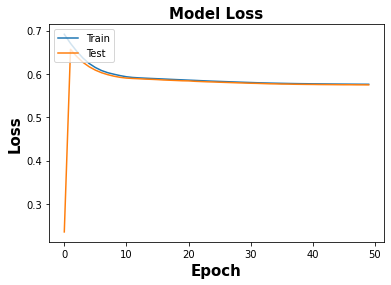

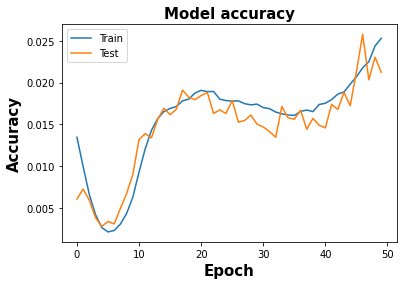

In [16]:
# _, train_acc = model1.evaluate(x_train, y_train, verbose=0)
# _, test_acc = model1.evaluate(x_test, y_test, verbose=0)
# print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

# summarize history for loss
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Model Loss',fontweight ='bold',fontsize = 15)
plt.ylabel('Loss',fontweight ='bold',fontsize = 15)
plt.xlabel('Epoch',fontweight ='bold',fontsize = 15)
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# summarize history for accuracy
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('Model accuracy',fontweight ='bold',fontsize = 15)
plt.ylabel('Accuracy',fontweight ='bold',fontsize = 15)
plt.xlabel('Epoch',fontweight ='bold',fontsize = 15)
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()